# 09 - Solving More Equations
Systems of equations, whether linear or non-linear, coupled or non-coupled come up in many different chemical engineering applications.  In this notebook, we will practice more solving systems of equations using Python and SymPy.

## Definitions

### Linear Equations
Linear equations have variables that are not raised to a power and are not functions of variables.  For example, $y = 2x + 3$ is a linear equation.  

### Non-linear Equations
Non-linear equations have terms with exponents other than 1 or functions of variables like $\sin(x)$ or $\exp(x)$. $y = 2x^2 + 3$ or $y=sin(x)$ are both non-linear equations. Most of the equations you'll encounter in chemical engineering are non-linear.

### Coupled Equations
Couple equations are equations that have variables in common.  For example, $y = 2x + 3$ and $y = 3x + 2$ are coupled equations because they both have $x$ and $y$ in common.

### Non-coupled Equations
Non-coupled equations do not have variables in common.  For example, $y = 2x + 3$ and $z = 3p + 2$ are non-coupled equations because they do not have any variables in common.

## Review: Linear coupled equations
Linear coupled equations are often seen in when solving material and energy balances during steady state conditions.

Remember, using linear algebra, we can write a system of linear equations as a matrix equation Ax=b: 
- First define the matrix $A$ and the array $b$.
- Use x = np.linalg.solve(A,b)

An example problem with multiple equations and variables is:

$$
\begin{align}
-2x_0 + x_1 = 1 \\
x_0 - 2x_1 + x_2 = 2 \\
x_1 - 2x_2 + x_3 = 3 \\
x_2 - 2x_3 + x_4 = 4 \\
x_3 - 2x_4 = 5
\end{align}
$$

$$
\left[
\begin{array}{ccccc}
  -2 & 1 & 0 & 0 & 0 \\
  1 & -2 & 1 & 0 & 0 \\
  0 & 1 & -2 & 1 & 0 \\
  0 & 0 & 1 & -2 & 1 \\
  0 & 0 & 0 & 1 & -2 \\
\end{array}\right]\cdot

\left[
\begin{array}{c}
  x_0 \\
  x_1 \\
  x_2 \\
  x_3 \\
  x_4 \\
\end{array}\right] =

\left[
\begin{array}{c}
  1 \\
  2 \\
  3 \\
  4 \\
  5 \\
\end{array}\right]
$$

In [44]:
import numpy as np
A = np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,-2]])
b = [1,2,3,4,5]

x = np.linalg.solve(A,b)
print("x =", x)

x = [ -5.83333333 -10.66666667 -13.5        -13.33333333  -9.16666667]


Here's a [link](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) to more linear algebra operations.

## Nonlinear equations
### 1-D equations (1 equation in 1 unknown).

Solving a nonlinear equation involves first putting it in the form $f(x)=0$. We know the function $f$ and we want to find the value of $x$ that gives $f(x)=0$.

To solve this, do the following:
* Define the function f(x)
* Set an initial guess for x.
* We need to import a library: ```from scipy.optimize import fsolve```
* Call the ```fsolve``` function: ```x = fsolve(f, x0)```
    * f is the name of the function you are solving, and x0 is your initial guess.
    


### Exercise

Solve for both roots of $f(x) = x^2-5.$

In [2]:
from scipy.optimize import fsolve
def f(x):
    return x**2 - 5

xguess_1 = 1.0
x1 = fsolve(f,xguess_1)

xguess_2 = -1.0
x2 = fsolve(f,xguess_2)

print(x1, x2)

[2.23606798] [-2.23606798]


```{note}
```fsolve``` returns an array of solutions:
-This is because ```fsolve``` can be used to find the solution to multiple equations in multiple unknowns.
- If you just have one equation in one unknown, they you can recover just the scalar answer instead of the array:
    - ```{code}
        x = fsolve(f, xguess)[0]
        ```
```

### Multiple equations in multiple unknowns
* We call this a *multi-dimensional* problem.
* Instead of $f(x)=0$, we solve
* $\vec{f}(\vec{x})=\vec{0}$.
    * That is, $\vec{x}$ is a vector of unknowns, and $\vec{f}$ is a vector of functions.
    * $\vec{f}(\vec{x})$ takes a vector $\vec{x}$, and returns a vector $\vec{f}$.


Consider solving the **two functions** for the **two unknowns**: 

$h(y,z) = 0 = y+2z$, and 

$g(y,z)=0=\sin(y)/z$.


We typically want all solvers to look like $f(x)=0$
* We would write these as $$f_0(x_0,x_1) = x_0+2x_1,$$ $$f_1(x_0,x_1) = \sin(x_0)/x_1,$$
which becomes: $$\left[\begin{matrix} f_0(x_0,x_1) \\ f_1(x_0,x_1)\end{matrix}\right] = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \left[\begin{matrix}0 \\ 0\end{matrix}\right],$$
or $$\vec{f}(\vec{x}) = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \vec{0},$$
that is, $$\vec{f}(\vec{x})=\vec{0}.$$

* We solve the system just like before:
    * Just define the vector function. It takes an array of unknowns $\vec{x}$, and returns an array of function values $\vec{f}$.
    * We use the same solver, but we give an array of initial guesses $\vec{x}_0$ of [y=1 and z=2].


**Note** Here is a [link](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to more information about the fsolve function with extra arguments that can give more control over the solution process.

In [3]:
def hg(yz):  
    y, z = yz                 # recover the vars for convenience 
    h = y + 2*z              # compute the function values
    g = np.sin(y)/z
    return (h,g)  # return array of function values

yz = fsolve(hg, (1,2))
print(f"y={yz[0]/np.pi:.1f}\u03C0, z={yz[1]/np.pi:.1f}\u03C0")

y=3.0π, z=-1.5π


There can be multiple solutions to non-linear equations.  The solver will only find one of them.  In some cases you may need to find all of the solutions. For example, in the above scenario, if the guess is changed to 100,2 (see below), I git a completely different answer.

In [4]:
yz = fsolve(hg, (100,2))
print(f"y={yz[0]/np.pi:.1f}\u03C0, z={yz[1]/np.pi:.1f}\u03C0")

y=38.0π, z=-19.0π


One way to do find many of the solutions is to loop through multiple guesses and if the solution is different, you could collect that solution into a list or array. For example, see the below code where the solver is called for an array of guess values and combinations thereof.

In [5]:
solutions = {'y':[], 'z':[]} #initialize a dictionary to store solutions
yguesses = np.linspace(-100,100,100)
zguesses = np.linspace(-100,100,100)
for yguess in yguesses:
    for zguess in zguesses:
        yz = fsolve(hg, (yguess,zguess))
        solutions['y'].append("{:.2f}".format(yz[0])) #number is converted to string to 
        solutions['z'].append("{:.2f}".format(yz[1])) #help with removing duplicates

In [6]:
#now, using pandas, remove the duplicates
import pandas as pd
df = pd.DataFrame(solutions)
df = df.drop_duplicates()
print(f'The number of unique solutions is at least {len(df)}')

The number of unique solutions is at least 224


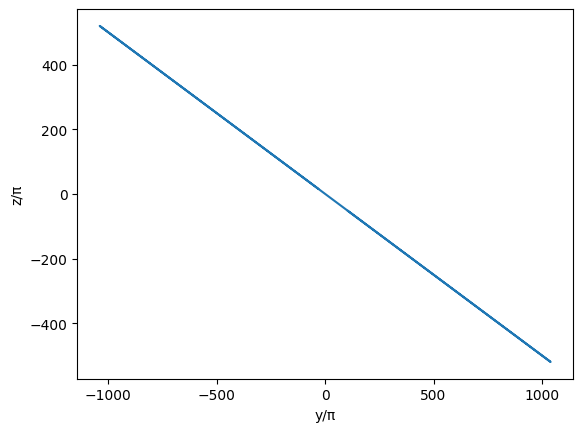

In [7]:
#now we can plot those solutions
import matplotlib.pyplot as plt
#convert the strings back to floats
df['y'] = df['y'].astype(float)/np.pi
df['z'] = df['z'].astype(float)/np.pi
plt.plot(df['y'],df['z'])
plt.xlabel('y/\u03C0');plt.ylabel('z/\u03C0')
plt.show()

In [8]:
-df['y']/2 - df['z']

0      -0.001592
16     -0.001592
26      0.000000
27      0.000000
48      0.000000
          ...   
9249    0.001592
9549    0.000000
9751    0.000000
9752    0.000000
9778   -0.001592
Length: 224, dtype: float64

It looks like the solutions lie in a line where $z = -1/2*y$.

### Sympy Solution 

In [9]:
#solve the above using sympy
import sympy as sym
y,z = sym.symbols('y,z')
sym.solve([y+2*z, sym.sin(y)/z], [y,z])


[(-pi, pi/2)]

### Another Exercise

Solve the following system of three equations in three unknowns:

$$x^2 + y^2 = 1,$$
$$xy + yz = -1.1,$$
$$y^2 + z^2 = 2.$$

In [10]:
def funcs(xyz):
    x,y,z = xyz
    
    eq0 = x**2 + y**2 - 1
    eq1 = x*y + y*z   + 1.1
    eq2 = y**2 + z**2 - 2
    
    return eq0, eq1, eq2

xyzGuess = (2,2,2)
xyz = fsolve(funcs, xyzGuess)
x,y,z = xyz

print(f'x={x:.5f}, y={y:.5f}, z={z:.5f}')

x=0.10056, y=-0.99493, z=1.00504


In [11]:
solns = {'x':[],'y':[],'z':[]} #initialize a dictionary to store solutions
xguesses = np.linspace(-10,10,10)
yguesses = np.linspace(-10,10,10)
zguesses = np.linspace(-10,10,10)
for xguess in xguesses:
    for yguess in yguesses:
        for zguess in zguesses:
            try:
                xyz = fsolve(funcs, (xguess,yguess,zguess))
                solns['x'].append("{:.2f}".format(xyz[0])) #number is converted to string to
                solns['y'].append("{:.2f}".format(xyz[1])) #number is converted to string to 
                solns['z'].append("{:.2f}".format(xyz[2])) #help with removing duplicates
            except:
                pass

/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [12]:
#now, using pandas, remove the duplicates
import pandas as pd
df2 = pd.DataFrame(solns)
df2 = df2.drop_duplicates()
print(f'The number of unique solutions is at least {len(df2)}')

The number of unique solutions is at least 20


In [13]:
df2

,x,y,z
0,0.10,-0.99,1.01
9,-0.10,0.99,-1.01
10,-0.86,0.50,-1.32
39,-10.00,-3.33,10.00
49,-10.00,-1.11,10.00
148,-7.78,-1.11,7.78
247,-5.56,-1.11,5.56
346,-3.33,-1.11,3.33
405,-1.11,-10.00,1.11
425,-1.11,-5.56,1.11


## ```args``` and tuple expansion

* Functions like ```fsolve```, ```quad``` and others have an argument called ```args``` that you can set to have those functions pass extra arguments to the function provide.
* But ```fsolve``` and ```quad``` (etc.) don't know how many arguments there are, and there could be an arbitrary number.
* **Tuple expansion to the rescue!**

### Example 1
* Below, function ```f``` can take any number of arguments.
* ```args``` is a tuple, and the ```*``` part of ```*args``` can be thought of as **collapsing** the provided list of arguments into the tuple ```args```. 
    * The name ```args``` doesn't matter. It can be anything.
* You can then loop over the elements of ```args```.

In [37]:
def f(*args):
    print(args)        # args is a tuple
    for arg in args:   # loop over elements of args
        print(arg)
    print(f"a is {args[4]['a']}")
    
f(1.1, 2.2, 3.3,'hello',{'a':[1,3,5,7],'b':[4,3]})       # call the func with multiple arguments

(1.1, 2.2, 3.3, 'hello', {'a': [1, 3, 5, 7], 'b': [4, 3]})
1.1
2.2
3.3
hello
{'a': [1, 3, 5, 7], 'b': [4, 3]}
a is [1, 3, 5, 7]


You can also refer to the keys in the dictionary within the function such as:

### Example 2

* Below, function ```f``` takes three arguments.
* When calling the function, we first make a tuple with three elements,
* Then we **expand** the tuple into values using ```*xyz```. 
    * The ```*``` part of ```*xyz``` acts to **expand** the tuple into elements that are then placed in the individual arguments that the function takes.

In [17]:
def f(x,y,z):
    print(x)
    print(y)
    print(z)
    
xyz = (1.1, 2.2, 3.3)
f(*xyz)

1.1
2.2
3.3


### Example 3
* Write my own version of ```quad``` that uses the trapazoid method, and passes in extra arguments that my function will need.
* See the line ```fx = f(x, *args)``` where the tuple of ```args``` I pass in to ```myQuad``` is expanded into the coefficients ```c0```, ```c1```, and ```c2``` of my quadratic function, defined below.

In [21]:
def myQuad(f, a, b, n=100, args=None):
    x = np.linspace(a,b,n)
    Δx = x[1]-x[0]
    if args is None:
        fx = f(x)
    else:
        fx = f(x, *args)
    I = -Δx/2*(fx[0]+fx[-1]) + Δx*np.sum(fx)
    return I
    
#---------------

def f(x, c0=1, c1=1, c2=1):
    return c2*x**2 + c1*x + c0

#---------------

I = myQuad(f, 0, 2, args=(1.1, 2.2, 3.3))
print(I)
I2 = myQuad(f, 0, 2)
print(I2)

15.40044893378227
6.666802707206749


In [22]:
#check of the above integration with quad
from scipy.integrate import quad
I = quad(f, 0, 2, args=(1.1, 2.2, 3.3))
print(I)

(15.4, 1.709743457922741e-13)


## ```kwargs``` and dictionaries

In [42]:
def func(**kwargs):
    for key, value in kwargs.items():
        print(f"{key} = {value}")
    print(f"The product of a and b is {kwargs['a']*kwargs['b']}")

In [43]:
func(a=1, b=2, c=3)

a = 1
b = 2
c = 3
The product of a and b is 2
